### **Chapter 6: Morphological Image Processing**

#### Giới thiệu 2 thuật toán: Dilation và Erosion
Erosion (thuật toán xói mòn) và Dilation (thuật toán giãn nở) là hai phép toán cơ bản trong xử lý ảnh hình thái học, được áp dụng cho ảnh nhị phân:<p>
- Erosion (Xói mòn): Erosion thu nhỏ kích thước của các đối tượng ở tiền cảnh (foreground), làm nhẵn các biên của đối tượng, và loại bỏ các chi tiết nhỏ như "bán đảo", "ngón tay", hoặc các đối tượng nhỏ lẻ. Thuật toán này hữu ích để loại bỏ các nhiễu nhỏ, làm cho các biên của đối tượng trở nên mịn hơn. Hàm binary_erosion() trong Python hỗ trợ thực hiện phép toán này nhanh chóng trên ảnh nhị phân.
- Dilation (Giãn nở): Dilation mở rộng kích thước của các đối tượng tiền cảnh, làm nhẵn các biên của đối tượng và lấp đầy các lỗ hoặc khoảng trống nhỏ trong ảnh nhị phân. Đây là phép toán ngược của Erosion. Hàm binary_dilation() cho phép áp dụng phép toán này lên ảnh nhị phân, kết hợp với các phần tử cấu trúc có kích thước khác nhau (ví dụ: sử dụng phần tử hình đĩa) để điều chỉnh mức độ giãn nở.

---

#### 1. **Dilation**

##### 1.1 Import các thư viện cần thiết

In [1]:
from skimage.io import imread
import matplotlib.pylab as pylab
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float


##### 1.2 Đọc ảnh và xử lý đầu vào

In [ ]:
im = img_as_float(imread('input/tagore.png'))
im = 1 - im[...,3]

- imread('../images/tagore.png'): Đọc ảnh tagore.png.
- img_as_float(imread(...)): Chuyển ảnh sang dạng số thực (float), với các giá trị từ 0 đến 1.
- im[...,3]: Truy cập vào kênh alpha của ảnh (nếu là ảnh PNG với kênh trong suốt). Kênh alpha chứa thông tin về độ trong suốt (opacity) của ảnh.
- im = 1 - im[...,3]: Đảo ngược giá trị của kênh alpha để các vùng trong suốt trở thành vùng sáng (giá trị gần 1) và ngược lại.

##### 1.3 Chuyển ảnh thành nhị phân

In [3]:
im[im <= 0.5] = 0
im[im > 0.5] = 1

- im[im <= 0.5] = 0: Đặt các giá trị nhỏ hơn hoặc bằng 0.5 thành 0, biến chúng thành các pixel tối.
- im[im > 0.5] = 1: Đặt các giá trị lớn hơn 0.5 thành 1, biến chúng thành các pixel sáng.
- Kết quả là một ảnh nhị phân với chỉ hai giá trị: 0 (đen) và 1 (trắng).

##### 1.4 Thiết lập và hiển thị ảnh gốc

(-0.5, 252.5, 339.5, -0.5)

<Figure size 640x480 with 0 Axes>

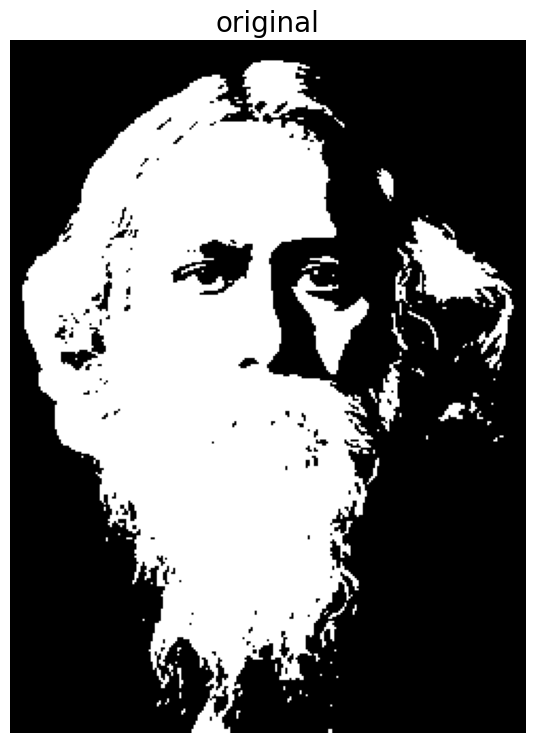

In [4]:
pylab.gray()
pylab.figure(figsize=(18,9))
pylab.imshow(im)
pylab.title('original', size=20)
pylab.axis('off')

- pylab.gray(): Đặt chế độ hiển thị ảnh là grayscale.
- pylab.figure(figsize=(18,9)): Tạo một figure mới có kích thước 18x9 inch.
- pylab.imshow(im): Hiển thị ảnh nhị phân gốc (im).
- pylab.title('original', size=20): Đặt tiêu đề cho subplot là "original" với kích thước chữ là 20.
- pylab.axis('off'): Tắt hiển thị các trục.

##### 1.5 Áp dụng phép giãn nở với đĩa có kích thước thay đổi và hiển thị kết quả

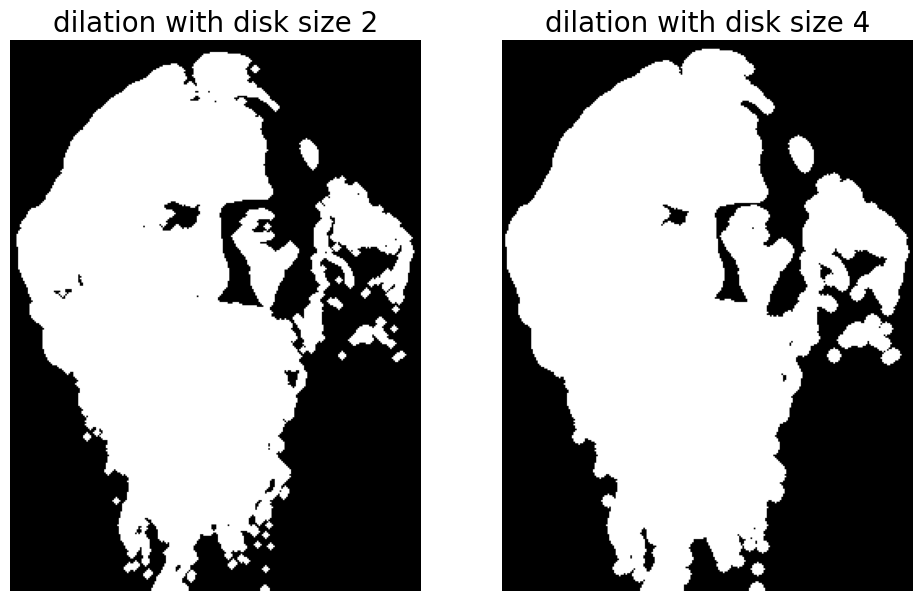

In [5]:
pylab.figure(figsize=(18,9))
for d in range(1,3):
    pylab.subplot(1,3,d+1)
    im1 = binary_dilation(im, disk(2*d))
    pylab.imshow(im1)
    pylab.title('dilation with disk size ' + str(2*d), size=20)
    pylab.axis('off')
pylab.show()

- for d in range(1,3): Lặp qua các giá trị của d từ 1 đến 2 để thử các kích thước đĩa khác nhau cho phép giãn nở.
    - pylab.subplot(1,3,d+1): Tạo một subplot ở vị trí thứ hai và thứ ba trong lưới 1x3 để hiển thị kết quả của phép giãn nở.
    - im1 = binary_dilation(im, disk(2*d)): Áp dụng phép giãn nở (binary_dilation) lên ảnh nhị phân im, với kích thước đĩa là 2*d. Kích thước đĩa càng lớn thì độ dày của các đối tượng trong ảnh sau giãn nở càng tăng.
    - pylab.imshow(im1): Hiển thị ảnh sau khi giãn nở (im1).
    - pylab.title('dilation with disk size ' + str(2*d), size=20): Đặt tiêu đề cho mỗi ảnh, ghi kích thước đĩa đã sử dụng cho phép giãn nở.
    - pylab.axis('off'): Tắt hiển thị các trục.

#### 2. Erosion

##### 2.1 Import thêm các thư viện cần thiết

In [6]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
from skimage.morphology import binary_erosion, rectangle

##### 2.2 Định nghĩa hàm plot_image

In [7]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off')

##### 2.3 Đọc ảnh và xử lý ảnh đầu vào

In [ ]:
im = rgb2gray(imread('input/clock2.jpg'))
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1
pylab.gray()

<Figure size 640x480 with 0 Axes>

##### 2.4 Triển khai thuật toán Erosion và hiện thị kết quả

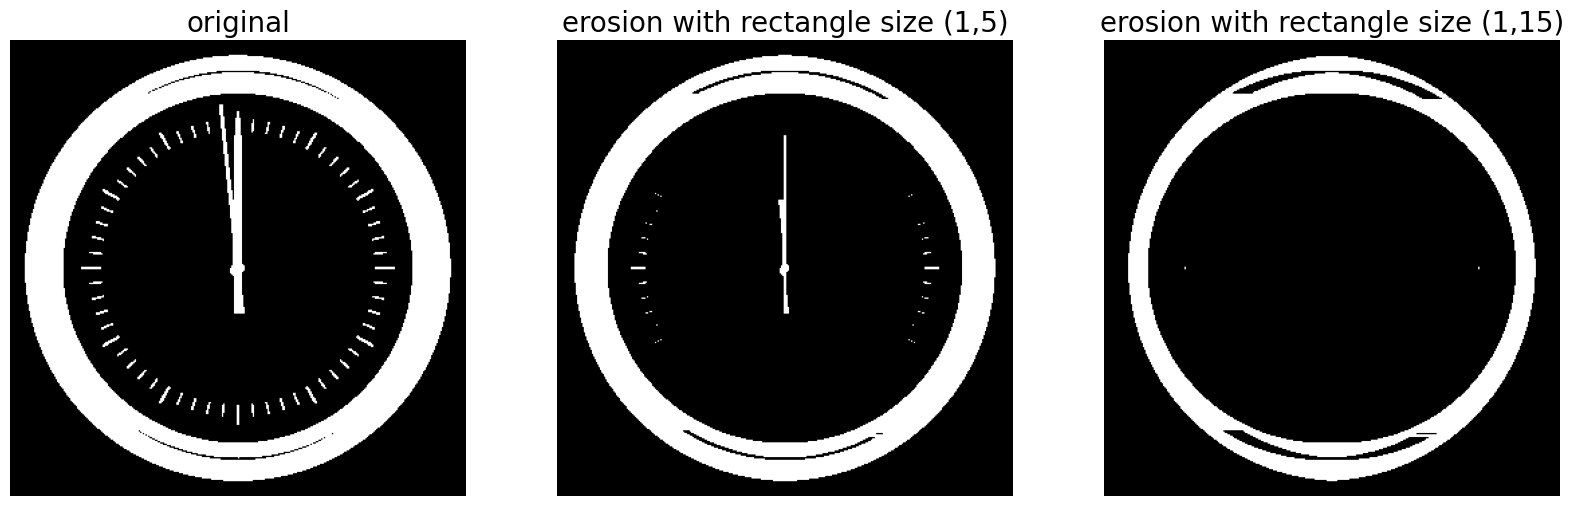

In [11]:
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_erosion(im, rectangle(1,5))
pylab.subplot(1,3,2), plot_image(im1, 'erosion with rectangle size (1,5)')
im1 = binary_erosion(im, rectangle(1,15))
pylab.subplot(1,3,3), plot_image(im1, 'erosion with rectangle size (1,15)')
pylab.show()

- im1 = binary_erosion(im, rectangle(1,5)) :
    - Thực hiện phép erosion (xói mòn) trên ảnh nhị phân im với hình chữ nhật kích thước (1,5) (chiều cao = 1 pixel, chiều rộng = 5 pixels).
    - Kết quả được lưu vào im1 và sau đó hiển thị trong subplot thứ hai với tiêu đề là "erosion with rectangle size (1,5)".
- im1 = binary_erosion(im, rectangle(1, 15)): tương tự với hình chữ nhật kích thước (1, 15)